# Headers and Definitions

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn
import pandas as pd
from pandas import tseries
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import thinkbayes2 as tb

import reporterFun as rf



# Get Data

Read in data from reporter_export.csv and store in Pandas DataFrame

In [2]:
reporter, dayReporter, sleepReporter, wakeReporter = rf.GetReporterData()

Int64Index([   8,   21,   37,   56,   72,   89,  107,  125,  142,  168,  175,
             187,  204,  223,  239,  254,  268,  299,  323,  339,  358,  375,
             393,  411,  427,  459,  491,  506,  522,  542,  561,  590,  601,
             618,  636,  651,  697,  714,  730,  749,  783,  801,  811,  824,
             842,  852,  854,  869,  884,  902,  938,  955,  972, 1036, 1058,
            1078, 1098, 1119, 1134, 1151, 1169, 1182, 1196, 1200, 1221, 1240],
           dtype='int64')
Int64Index([   9,   22,   38,   57,   73,   90,  108,  126,  143,  169,  176,
             188,  205,  224,  240,  255,  269,  300,  324,  340,  359,  376,
             394,  412,  428,  460,  492,  507,  523,  543,  562,  602,  619,
             637,  652,  698,  715,  731,  750,  784,  802,  812,  825,  843,
             853,  855,  870,  885,  903,  939,  956,  973, 1037, 1059, 1079,
            1099, 1120, 1135, 1152, 1170, 1183, 1197, 1201, 1222, 1241],
           dtype='int64')
590
Int64Index([

reporterFun.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sleepSeries.drop(sleepSeries.index[i], inplace=True)


In [3]:
print reporter.tail(20)['Slept']

1234       NaN
1235       NaN
1236       NaN
1237       NaN
1238       NaN
1239       NaN
1240       NaN
1241    Poorly
1242       NaN
1243       NaN
1244       NaN
1245       NaN
1246       NaN
1247       NaN
1248       NaN
1249       NaN
1250       NaN
1251       NaN
1252       NaN
1253       NaN
Name: Slept, dtype: object


In [10]:
rf.getUnique(wakeReporter['Wake.feel'])

array(['Clear', 'Exhausted', 'Forgot to Turn Sleep Off', 'Groggy', 'Sleepy'], 
      dtype='|S24')

# Testing

Want to test a Bayesian model of p(content | programming) to the actual probability.

In [5]:
dayReporter = rf.extractDay(reporter)
trainReporter, testReporter = sklearn.model_selection.train_test_split(dayReporter, test_size =0.2)

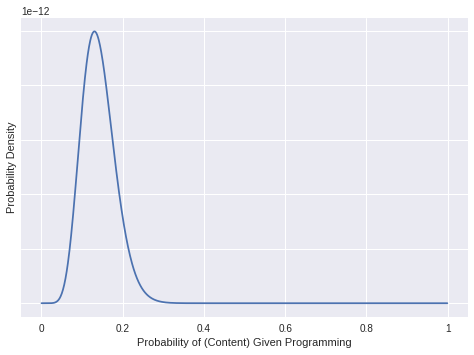

In [6]:
bayes = rf.targetBayes(trainReporter, 'Activity', 'Programming', 'Mood', 'Content', display=True)

In [7]:
programmingObs = rf.extractTokenObs(testReporter, tokenType='Activity', token='Programming')
programmingMood = rf.populateBinaryCols(programmingObs['Mood'])
contentProb = programmingMood['Content'].mean()
print contentProb

0.272727272727


Alternatively, can look at the difference between distributions calculated on split data:

In [8]:
dayReporter = rf.extractDay(reporter)
trainReporter, testReporter = sklearn.model_selection.train_test_split(dayReporter, test_size =0.5)
train = rf.targetBayes(trainReporter, 'Activity', 'Programming', 'Mood', 'Content')
test = rf.targetBayes(testReporter, 'Activity', 'Programming', 'Mood', 'Content')


/home/hocjordan/anaconda2/envs/Reporter/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


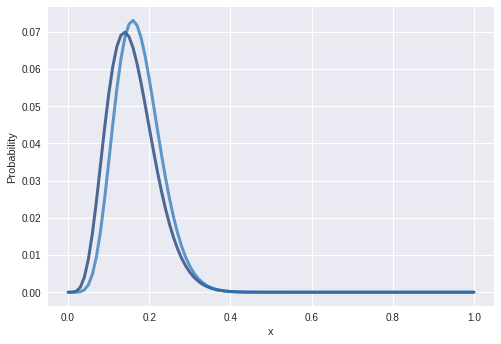

In [9]:
import thinkplot

thinkplot.Pdf(train.MakePmf())
thinkplot.Pdf(test.MakePmf())
thinkplot.Config(xlabel='x', ylabel='Probability')

Posterior predictive model checking: compare actual and predicted data either visually or using some kind of quantitative measure.